In [ ]:
# 2015 Flight Delay & Cancellation

### Business Problem

To classify whether a flight will be delayed or not by more than 10 mins.

**Feature Columns**

MONTH, DAY, DAY_OF_WEEK: data type int <br>
AIRLINE and FLIGHT_NUMBER: data type int <br>
ORIGIN_AIRPORT and DESTINATION_AIRPORT: data type string <br>
SCHEDUAL_DEPARTURE, DEPARTURE_TIME, DEPARTURE_DELAY,
SCHEDUAL_ARRIVAL, ARRIVAL_TIME : data type float <br>
ARRIVAL_DELAY: this will be the target and is transformed into boolean variable indicating delay of more than 10 minutes <br>
DISTANCE and AIR_TIME: data type float <br>


You can learn more about this dataset from the folowing Kaggle link.
https://www.kaggle.com/usdot/flight-delays/data?source=post_page---------------------------

**Objectve**:
To determine whether the flight will be delayed or not.

### Import necessary packages

In [ ]:
!pip freeze | grep pandas

geopandas==0.13.2
pandas==1.5.3
pandas-datareader==0.10.0
pandas-gbq==0.17.9
pandas-profiling==3.6.6
pandas-stubs==1.5.3.230304
sklearn-pandas==2.2.0


In [ ]:
!pip install pydantic --upgrade


In [ ]:
# https://pypi.python.org/pypi/pydot
!apt-get -qq install -y graphviz && pip install pydot
import pydot

In [ ]:
!pip install pandas-profiling


In [ ]:
!pip install ydata-profiling

In [ ]:
import pandas as pd
import numpy as np
import time
from ydata_profiling import ProfileReport
#import pandas_profiling
import matplotlib.pyplot as plt
import plotly.express as px
%matplotlib inline
import seaborn as sns

## Loading Data

In [ ]:
df = pd.read_csv("/content/flights.csv")                  # Reading the dataset
df.head()

YEAR  MONTH  DAY  DAY_OF_WEEK AIRLINE  FLIGHT_NUMBER TAIL_NUMBER  \
0  2015      1    1            4      AS             98      N407AS   
1  2015      1    1            4      AA           2336      N3KUAA   
2  2015      1    1            4      US            840      N171US   
3  2015      1    1            4      AA            258      N3HYAA   
4  2015      1    1            4      AS            135      N527AS   

  ORIGIN_AIRPORT DESTINATION_AIRPORT  SCHEDULED_DEPARTURE  ...  ARRIVAL_TIME  \
0            ANC                 SEA                  5.0  ...         408.0   
1            LAX                 PBI                 10.0  ...         741.0   
2            SFO                 CLT                 20.0  ...         811.0   
3            LAX                 MIA                 20.0  ...         756.0   
4            SEA                 ANC                 25.0  ...         259.0   

   ARRIVAL_DELAY  DIVERTED  CANCELLED  CANCELLATION_REASON  AIR_SYSTEM_DELAY  \
0          -22.0       0.0        0.0                  NaN               NaN   
1           -9.0       0.0        0.0                  NaN               NaN   
2            5.0       0.0        0.0                  NaN               NaN   
3           -9.0       0.0        0.0                  NaN               NaN   
4          -21.0       0.0        0.0                  NaN               NaN   

   SECURITY_DELAY  AIRLINE_DELAY  LATE_AIRCRAFT_DELAY  WEATHER_DELAY  
0             NaN            NaN                  NaN            NaN  
1             NaN            NaN                  NaN            NaN  
2             NaN            NaN                  NaN            NaN  
3             NaN            NaN                  NaN            NaN  
4             NaN            NaN                  NaN            NaN  

[5 rows x 31 columns]

## Data Summary

In [ ]:
df.describe()

YEAR         MONTH           DAY   DAY_OF_WEEK  FLIGHT_NUMBER  \
count  1807059.0  1.807059e+06  1.807059e+06  1.807059e+06   1.807059e+06   
mean      2015.0  2.465685e+00  1.497069e+01  3.952209e+00   2.230250e+03   
std          0.0  1.102565e+00  8.455242e+00  1.973077e+00   1.786322e+03   
min       2015.0  1.000000e+00  1.000000e+00  1.000000e+00   1.000000e+00   
25%       2015.0  1.000000e+00  8.000000e+00  2.000000e+00   7.500000e+02   
50%       2015.0  3.000000e+00  1.500000e+01  4.000000e+00   1.705000e+03   
75%       2015.0  3.000000e+00  2.200000e+01  6.000000e+00   3.430000e+03   
max       2015.0  4.000000e+00  3.100000e+01  7.000000e+00   9.794000e+03   

       SCHEDULED_DEPARTURE  DEPARTURE_TIME  DEPARTURE_DELAY      TAXI_OUT  \
count         1.807058e+06    1.760791e+06     1.760791e+06  1.759797e+06   
mean          1.327642e+03    1.336312e+03     9.922928e+00  1.624987e+01   
std           4.771680e+02    4.890259e+02     3.730369e+01  9.375389e+00   
min           1.000000e+00    1.000000e+00    -6.800000e+01  1.000000e+00   
25%           9.200000e+02    9.260000e+02    -5.000000e+00  1.100000e+01   
50%           1.323000e+03    1.331000e+03    -1.000000e+00  1.400000e+01   
75%           1.725000e+03    1.736000e+03     9.000000e+00  1.900000e+01   
max           2.359000e+03    2.400000e+03     1.988000e+03  2.250000e+02   

         WHEELS_OFF  ...  SCHEDULED_ARRIVAL  ARRIVAL_TIME  ARRIVAL_DELAY  \
count  1.759797e+06  ...       1.807058e+06  1.758390e+06   1.755036e+06   
mean   1.359291e+03  ...       1.501790e+03  1.487178e+03   5.765611e+00   
std    4.897209e+02  ...       4.967496e+02  5.162927e+02   3.983382e+01   
min    1.000000e+00  ...       1.000000e+00  1.000000e+00  -8.700000e+01   
25%    9.410000e+02  ...       1.116000e+03  1.109000e+03  -1.200000e+01   
50%    1.345000e+03  ...       1.524000e+03  1.519000e+03  -4.000000e+00   
75%    1.750000e+03  ...       1.918000e+03  1.918000e+03   1.000000e+01   
max    2.400000e+03  ...       2.400000e+03  2.400000e+03   1.971000e+03   

           DIVERTED     CANCELLED  AIR_SYSTEM_DELAY  SECURITY_DELAY  \
count  1.807058e+06  1.807058e+06     358899.000000   358899.000000   
mean   2.419402e-03  2.636883e-02         13.559801        0.058050   
std    4.912789e-02  1.602296e-01         26.681902        1.837254   
min    0.000000e+00  0.000000e+00          0.000000        0.000000   
25%    0.000000e+00  0.000000e+00          0.000000        0.000000   
50%    0.000000e+00  0.000000e+00          3.000000        0.000000   
75%    0.000000e+00  0.000000e+00         18.000000        0.000000   
max    1.000000e+00  1.000000e+00       1101.000000      241.000000   

       AIRLINE_DELAY  LATE_AIRCRAFT_DELAY  WEATHER_DELAY  
count  358899.000000        358899.000000  358899.000000  
mean       18.168501            22.564398       3.076590  
std        46.005625            41.880679      21.474529  
min         0.000000             0.000000       0.000000  
25%         0.000000             0.000000       0.000000  
50%         2.000000             3.000000       0.000000  
75%        18.000000            28.000000       0.000000  
max      1971.000000          1313.000000    1152.000000  

[8 rows x 26 columns]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1807059 entries, 0 to 1807058
Data columns (total 31 columns):
 #   Column               Dtype  
---  ------               -----  
 0   YEAR                 int64  
 1   MONTH                int64  
 2   DAY                  int64  
 3   DAY_OF_WEEK          int64  
 4   AIRLINE              object 
 5   FLIGHT_NUMBER        int64  
 6   TAIL_NUMBER          object 
 7   ORIGIN_AIRPORT       object 
 8   DESTINATION_AIRPORT  object 
 9   SCHEDULED_DEPARTURE  float64
 10  DEPARTURE_TIME       float64
 11  DEPARTURE_DELAY      float64
 12  TAXI_OUT             float64
 13  WHEELS_OFF           float64
 14  SCHEDULED_TIME       float64
 15  ELAPSED_TIME         float64
 16  AIR_TIME             float64
 17  DISTANCE             float64
 18  WHEELS_ON            float64
 19  TAXI_IN              float64
 20  SCHEDULED_ARRIVAL    float64
 21  ARRIVAL_TIME         float64
 22  ARRIVAL_DELAY        float64
 23  DIVERTED             float64
 24

In [ ]:
df.shape

(1807059, 31)

- Since the data we have is quite huge nearly 58 lac rows and 31 features, hence we will try to reduce by dropping few unwanted features.

## Selecting Features

In [ ]:
# Selecting important features

df = df[["MONTH", "DAY", "DAY_OF_WEEK", "AIRLINE", "FLIGHT_NUMBER", "DESTINATION_AIRPORT", "ORIGIN_AIRPORT",
         "SCHEDULED_DEPARTURE", "DEPARTURE_TIME", "DEPARTURE_DELAY",
         "SCHEDULED_ARRIVAL", "ARRIVAL_TIME", "ARRIVAL_DELAY", "AIR_TIME", "DISTANCE"]]

## Data Sample

In [ ]:
df = df.sample(n=10000, random_state= 10, axis=0)
df.shape

(10000, 15)

## Pandas Profiling

In [ ]:
report = ProfileReport(df)
report.to_file('flight_df.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
from IPython.display import display, HTML, IFrame
display(HTML(open('flight_df.html').read()))

**Observation:-** As per Pandas Profiling
- High Correlation between:-
    - MONTH & df_index,
    - DEPARTURE_TIME & SCHEDULED_DEPARTURE,
    - ARRIVAL_DELAY & DEPARTURE_DELAY,
    - DISTANCE & AIR_TIME.
- DESTINATION_AIRPORT & ORIGIN_AIRPORT has 3 letter apha values and some have numerical values hence need to work on.
- DEPARTURE_DELAY has 572 (5.7%) zeros, which means flight on time so ignore
- ARRIVAL_DELAY has 232 (2.3%) zeros, which means flight on time so ignore
- DEPARTURE_TIME has 179 (1.8%) missing values
- DEPARTURE_DELAY has 179 (1.8%) missing values
- ARRIVAL_TIME has 185 (1.8%) missing values
- ARRIVAL_DELAY has 207 (2.1%) missing values
- AIR_TIME has 207 (2.1%) missing values

## Missing Values#

In [ ]:
# Origin and Destination airport has few values which are numeric

# Making a function to replace all numerical values in origin and destination airport feature with np.nan
def Replace(i):
    try:
      if str(i).isalpha():
        return str(i)
    except:
      i == np.nan
      return i


In [ ]:
# Applying function to replace
df['DESTINATION_AIRPORT'] = df['DESTINATION_AIRPORT'].apply(func=Replace)
df['ORIGIN_AIRPORT'] = df['ORIGIN_AIRPORT'].apply(func=Replace)
df.isna().sum()

MONTH                    0
DAY                      0
DAY_OF_WEEK              0
AIRLINE                  0
FLIGHT_NUMBER            0
DESTINATION_AIRPORT      0
ORIGIN_AIRPORT           0
SCHEDULED_DEPARTURE      0
DEPARTURE_TIME         273
DEPARTURE_DELAY        273
SCHEDULED_ARRIVAL        0
ARRIVAL_TIME           291
ARRIVAL_DELAY          308
AIR_TIME               308
DISTANCE                 0
dtype: int64

**Observation**
- Departure Time, Departure Delay, Arrival Time, Arrival Delay and Air Time has missing value.
- Lets drop all missng values as its less then 2% of the entire data, and filling it with median or mode will not give a real or close to real time of departure or arrival.
- Airtime missing is for the same data which has arrival and departure time and delay time missing. Hence drop all nan

In [ ]:
# Dropping all NAN missing values
df.dropna(inplace=True)
df.shape

(9692, 15)

**Now we have 9013 data with 15 features**

In [ ]:
df.head()

MONTH  DAY  DAY_OF_WEEK AIRLINE  FLIGHT_NUMBER DESTINATION_AIRPORT  \
1599923      4   13            1      WN            316                 BOS   
1463040      4    4            6      DL           2243                 MSP   
375875       1   25            7      WN           3212                 TPA   
1612206      4   13            1      DL           1630                 SAT   
1681279      4   18            6      DL           2485                 MSP   

        ORIGIN_AIRPORT  SCHEDULED_DEPARTURE  DEPARTURE_TIME  DEPARTURE_DELAY  \
1599923            STL                835.0           841.0              6.0   
1463040            TPA               1535.0          1535.0              0.0   
375875             RDU               1755.0          1751.0             -4.0   
1612206            ATL               2105.0          2100.0             -5.0   
1681279            MKE                700.0           656.0             -4.0   

         SCHEDULED_ARRIVAL  ARRIVAL_TIME  ARRIVAL_DELAY  AIR_TIME  DISTANCE  
1599923             1210.0        1200.0          -10.0     128.0    1047.0  
1463040             1759.0        1753.0           -6.0     188.0    1306.0  
375875              1950.0        1945.0           -5.0      99.0     587.0  
1612206             2244.0        2244.0            0.0     125.0     874.0  
1681279              822.0         808.0          -14.0      52.0     297.0

# Data Visualization

## Avg. Departure Delay based on AIRLINE

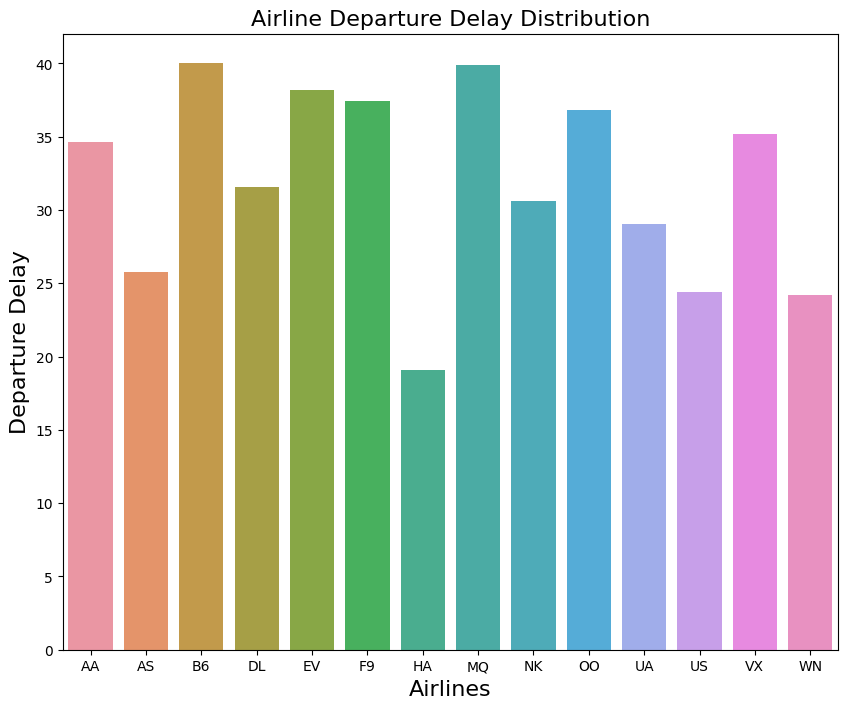

In [ ]:
df_delay = df[df.DEPARTURE_DELAY >= 1]
dep_delayed_flights = df_delay.groupby(['AIRLINE'], as_index=False).agg({'DEPARTURE_DELAY': 'mean'})

f, ax = plt.subplots(figsize=(10, 8))
sns.barplot(x='AIRLINE', y='DEPARTURE_DELAY', data=dep_delayed_flights, ax=ax)
ax.set_title('Airline Departure Delay Distribution', fontsize=16)
ax.set_ylabel("Departure Delay", fontsize=16)
ax.set_xlabel("Airlines", fontsize=16)
plt.show()

## Avg. Arrival Delay based on AIRLINE

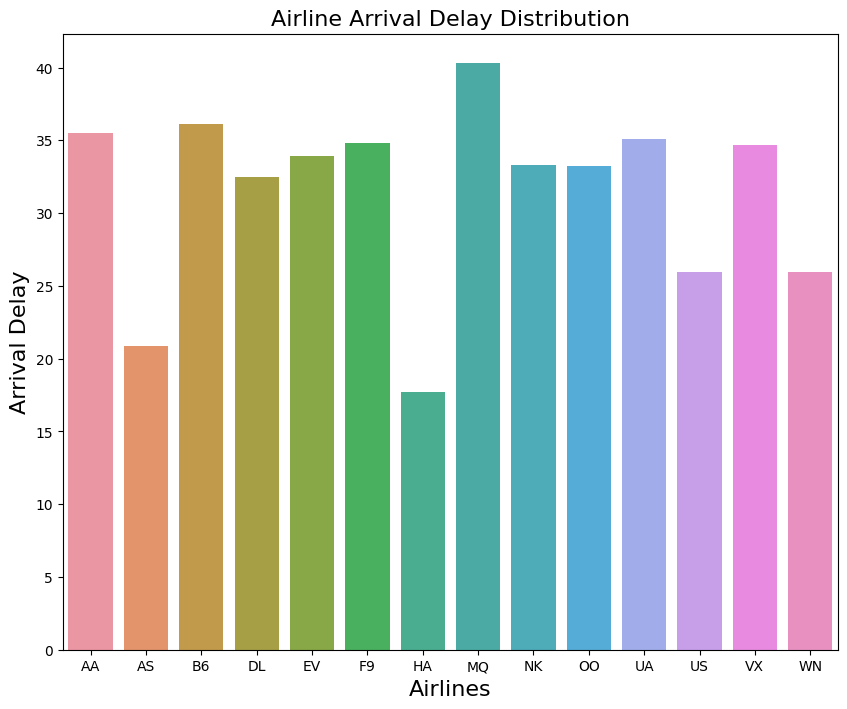

In [ ]:
df_delay1 = df[df.ARRIVAL_DELAY >= 1]
dep_delayed_flights = df_delay1.groupby(['AIRLINE'], as_index=False).agg({'ARRIVAL_DELAY': 'mean'})

f, ax = plt.subplots(figsize=(10, 8))
sns.barplot(x='AIRLINE', y='ARRIVAL_DELAY', data=dep_delayed_flights, ax=ax)
ax.set_title('Airline Arrival Delay Distribution', fontsize=16)
ax.set_ylabel("Arrival Delay", fontsize=16)
ax.set_xlabel("Airlines", fontsize=16)
plt.show()


## Top 10 Airports with max DEPARTURE_DELAY

In [ ]:
# To find the max 10th departure delay
df.nlargest(10, 'DEPARTURE_DELAY')[9:]

MONTH  DAY  DAY_OF_WEEK AIRLINE  FLIGHT_NUMBER DESTINATION_AIRPORT  \
877789      2   27            5      DL           1556                 MSP   

       ORIGIN_AIRPORT  SCHEDULED_DEPARTURE  DEPARTURE_TIME  DEPARTURE_DELAY  \
877789            MSN               1308.0          1854.0            346.0   

        SCHEDULED_ARRIVAL  ARRIVAL_TIME  ARRIVAL_DELAY  AIR_TIME  DISTANCE  
877789             1414.0        1951.0          337.0      44.0     228.0

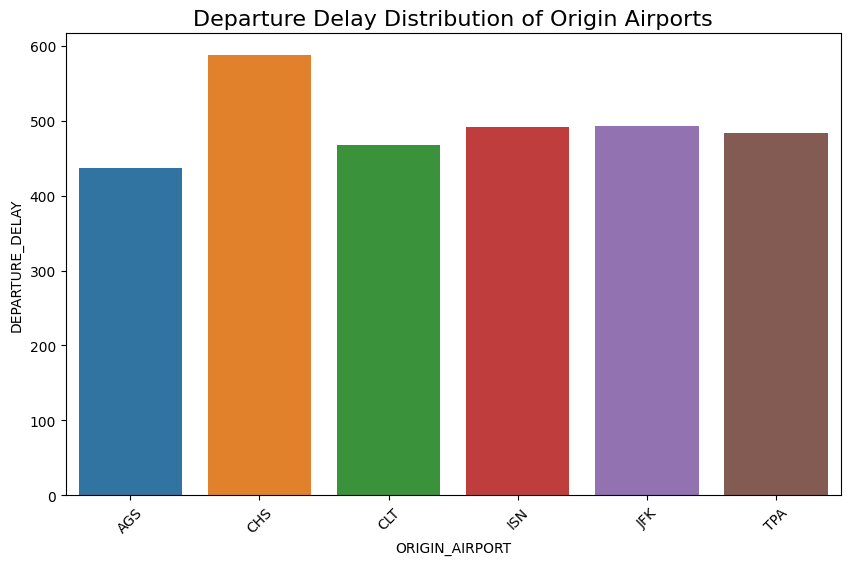

In [ ]:
## We see that the 10th larges value for Departure Delay is 429 minutes
dep_delay_airports = df[df['DEPARTURE_DELAY'] > 427][['ORIGIN_AIRPORT', 'DEPARTURE_DELAY']]

dep_delay_airports['ORIGIN_AIRPORT'] = dep_delay_airports['ORIGIN_AIRPORT'].astype('category')

f, ax = plt.subplots(figsize=(10, 6))
sns.barplot(x='ORIGIN_AIRPORT', y='DEPARTURE_DELAY', data=dep_delay_airports, ax=ax)
ax.set_title('Departure Delay Distribution of Origin Airports', fontsize=16)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
plt.show()


## Top 10 Airports with max ARRIVAL_DELAY

In [ ]:
# To find the max 10th arrival delay
df.nlargest(10, 'ARRIVAL_DELAY')[9:]

MONTH  DAY  DAY_OF_WEEK AIRLINE  FLIGHT_NUMBER DESTINATION_AIRPORT  \
877789      2   27            5      DL           1556                 MSP   

       ORIGIN_AIRPORT  SCHEDULED_DEPARTURE  DEPARTURE_TIME  DEPARTURE_DELAY  \
877789            MSN               1308.0          1854.0            346.0   

        SCHEDULED_ARRIVAL  ARRIVAL_TIME  ARRIVAL_DELAY  AIR_TIME  DISTANCE  
877789             1414.0        1951.0          337.0      44.0     228.0

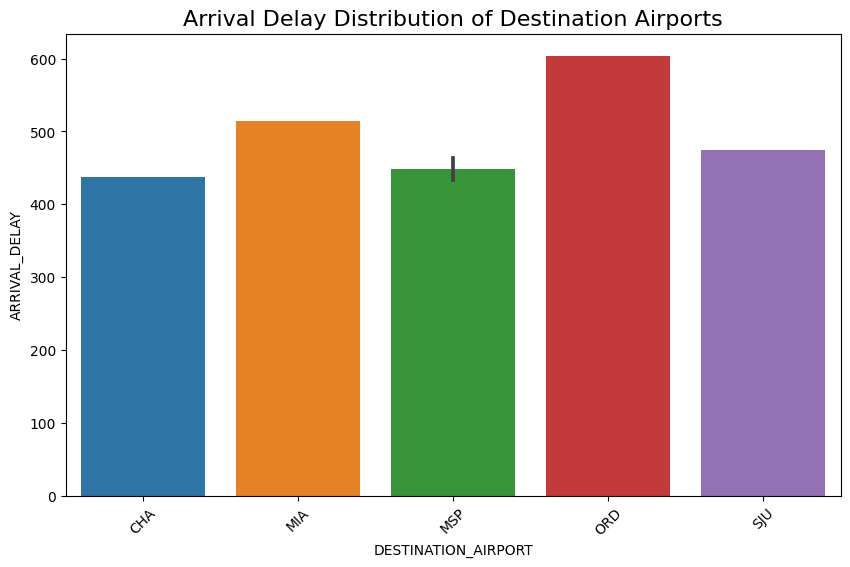

In [ ]:
## We see that the 10th larges value for Arrival Delay is 434 minutes

arr_delay_airports = df[df['ARRIVAL_DELAY'] > 427][['DESTINATION_AIRPORT', 'ARRIVAL_DELAY']]
arr_delay_airports['DESTINATION_AIRPORT'] = arr_delay_airports['DESTINATION_AIRPORT'].astype('category')

f, ax = plt.subplots(figsize=(10, 6))
sns.barplot(x='DESTINATION_AIRPORT', y='ARRIVAL_DELAY', data=arr_delay_airports, ax=ax, saturation=0.8)
ax.set_title('Arrival Delay Distribution of Destination Airports', fontsize=16)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
plt.close(2)
plt.show()


## Top 10 maximum delay flight numbers

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


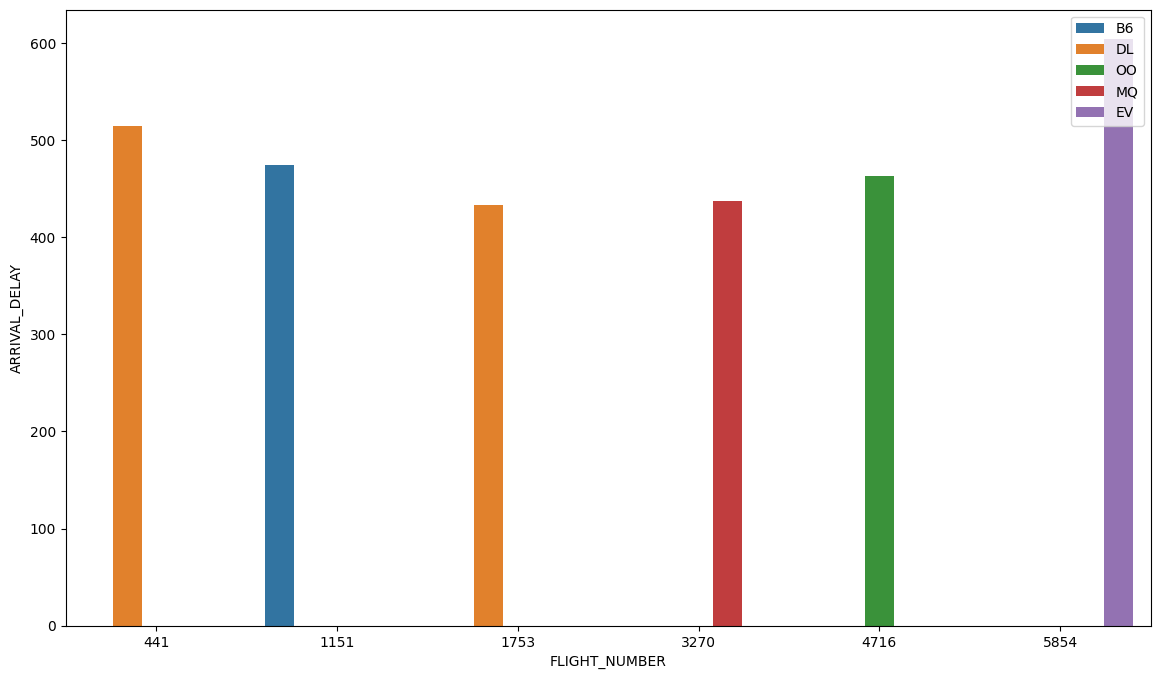

In [ ]:
arr_delay_flightnum = df[df['ARRIVAL_DELAY']>430][['FLIGHT_NUMBER', 'ARRIVAL_DELAY', 'AIRLINE']]
arr_delay_log = np.log(df['ARRIVAL_DELAY'])
f, ax = plt.subplots(figsize=(14, 8))
sns.barplot(x='FLIGHT_NUMBER', y='ARRIVAL_DELAY', data=arr_delay_flightnum, hue='AIRLINE')

ax.legend(bbox_to_anchor=(1, 1), loc='upper right')


## Feature Engineering

In [ ]:
# using labelencoding and give conditions to Arrival delay colum
df['ARRIVAL_DELAY'].value_counts()

-6.0      310
-7.0      301
-8.0      298
-9.0      292
-5.0      288
         ... 
 176.0      1
 300.0      1
 245.0      1
 167.0      1
 153.0      1
Name: ARRIVAL_DELAY, Length: 287, dtype: int64

In [ ]:
df["ARRIVAL_DELAY"] = (df["ARRIVAL_DELAY"]>10)*1    # Checking if delay is greater than 10 mins
df['ARRIVAL_DELAY'].value_counts()

0    7372
1    2320
Name: ARRIVAL_DELAY, dtype: int64

In [ ]:
# So we see that 2033 fights in our sample data has arrival delay more than 10 minutes

In [ ]:
df.head()

MONTH  DAY  DAY_OF_WEEK AIRLINE  FLIGHT_NUMBER DESTINATION_AIRPORT  \
1599923      4   13            1      WN            316                 BOS   
1463040      4    4            6      DL           2243                 MSP   
375875       1   25            7      WN           3212                 TPA   
1612206      4   13            1      DL           1630                 SAT   
1681279      4   18            6      DL           2485                 MSP   

        ORIGIN_AIRPORT  SCHEDULED_DEPARTURE  DEPARTURE_TIME  DEPARTURE_DELAY  \
1599923            STL                835.0           841.0              6.0   
1463040            TPA               1535.0          1535.0              0.0   
375875             RDU               1755.0          1751.0             -4.0   
1612206            ATL               2105.0          2100.0             -5.0   
1681279            MKE                700.0           656.0             -4.0   

         SCHEDULED_ARRIVAL  ARRIVAL_TIME  ARRIVAL_DELAY  AIR_TIME  DISTANCE  
1599923             1210.0        1200.0              0     128.0    1047.0  
1463040             1759.0        1753.0              0     188.0    1306.0  
375875              1950.0        1945.0              0      99.0     587.0  
1612206             2244.0        2244.0              0     125.0     874.0  
1681279              822.0         808.0              0      52.0     297.0

## Converting Data Type

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9692 entries, 1599923 to 806771
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   MONTH                9692 non-null   int64  
 1   DAY                  9692 non-null   int64  
 2   DAY_OF_WEEK          9692 non-null   int64  
 3   AIRLINE              9692 non-null   object 
 4   FLIGHT_NUMBER        9692 non-null   int64  
 5   DESTINATION_AIRPORT  9692 non-null   object 
 6   ORIGIN_AIRPORT       9692 non-null   object 
 7   SCHEDULED_DEPARTURE  9692 non-null   float64
 8   DEPARTURE_TIME       9692 non-null   float64
 9   DEPARTURE_DELAY      9692 non-null   float64
 10  SCHEDULED_ARRIVAL    9692 non-null   float64
 11  ARRIVAL_TIME         9692 non-null   float64
 12  ARRIVAL_DELAY        9692 non-null   int64  
 13  AIR_TIME             9692 non-null   float64
 14  DISTANCE             9692 non-null   float64
dtypes: float64(7), int64(5), objec

In [ ]:
# We have features like AIRLINE, DESTINATION_AIRPORT, ORIGIN_AIRPORT which are categorical data
# Hence convert them to category

In [ ]:
# Categorical columns

cols = ["AIRLINE","DESTINATION_AIRPORT","ORIGIN_AIRPORT"]
for item in cols:
    df[item] = df[item].astype("category")

# Lets check data type again
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9692 entries, 1599923 to 806771
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   MONTH                9692 non-null   int64   
 1   DAY                  9692 non-null   int64   
 2   DAY_OF_WEEK          9692 non-null   int64   
 3   AIRLINE              9692 non-null   category
 4   FLIGHT_NUMBER        9692 non-null   int64   
 5   DESTINATION_AIRPORT  9692 non-null   category
 6   ORIGIN_AIRPORT       9692 non-null   category
 7   SCHEDULED_DEPARTURE  9692 non-null   float64 
 8   DEPARTURE_TIME       9692 non-null   float64 
 9   DEPARTURE_DELAY      9692 non-null   float64 
 10  SCHEDULED_ARRIVAL    9692 non-null   float64 
 11  ARRIVAL_TIME         9692 non-null   float64 
 12  ARRIVAL_DELAY        9692 non-null   int64   
 13  AIR_TIME             9692 non-null   float64 
 14  DISTANCE             9692 non-null   float64 
dtypes: category(3

In [ ]:
# Now lets LabelEncode the categorical features for Model building
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
col = ['AIRLINE', 'DESTINATION_AIRPORT', 'ORIGIN_AIRPORT']
le.fit(df[col].values.flatten())

df[col] = df[col].apply(le.fit_transform)
df.head()

MONTH  DAY  DAY_OF_WEEK  AIRLINE  FLIGHT_NUMBER  DESTINATION_AIRPORT  \
1599923      4   13            1       13            316                   31   
1463040      4    4            6        3           2243                  186   
375875       1   25            7       13           3212                  262   
1612206      4   13            1        3           1630                  230   
1681279      4   18            6        3           2485                  186   

         ORIGIN_AIRPORT  SCHEDULED_DEPARTURE  DEPARTURE_TIME  DEPARTURE_DELAY  \
1599923             258                835.0           841.0              6.0   
1463040             265               1535.0          1535.0              0.0   
375875              225               1755.0          1751.0             -4.0   
1612206              13               2105.0          2100.0             -5.0   
1681279             176                700.0           656.0             -4.0   

         SCHEDULED_ARRIVAL  ARRIVAL_TIME  ARRIVAL_DELAY  AIR_TIME  DISTANCE  
1599923             1210.0        1200.0              0     128.0    1047.0  
1463040             1759.0        1753.0              0     188.0    1306.0  
375875              1950.0        1945.0              0      99.0     587.0  
1612206             2244.0        2244.0              0     125.0     874.0  
1681279              822.0         808.0              0      52.0     297.0

## Splitting Data in X & y

In [ ]:
X = df.drop('ARRIVAL_DELAY', 1)
y = df['ARRIVAL_DELAY']

<ipython-input-35-dd0de08c179b>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = df.drop('ARRIVAL_DELAY', 1)


In [ ]:
X.head()

MONTH  DAY  DAY_OF_WEEK  AIRLINE  FLIGHT_NUMBER  DESTINATION_AIRPORT  \
1599923      4   13            1       13            316                   31   
1463040      4    4            6        3           2243                  186   
375875       1   25            7       13           3212                  262   
1612206      4   13            1        3           1630                  230   
1681279      4   18            6        3           2485                  186   

         ORIGIN_AIRPORT  SCHEDULED_DEPARTURE  DEPARTURE_TIME  DEPARTURE_DELAY  \
1599923             258                835.0           841.0              6.0   
1463040             265               1535.0          1535.0              0.0   
375875              225               1755.0          1751.0             -4.0   
1612206              13               2105.0          2100.0             -5.0   
1681279             176                700.0           656.0             -4.0   

         SCHEDULED_ARRIVAL  ARRIVAL_TIME  AIR_TIME  DISTANCE  
1599923             1210.0        1200.0     128.0    1047.0  
1463040             1759.0        1753.0     188.0    1306.0  
375875              1950.0        1945.0      99.0     587.0  
1612206             2244.0        2244.0     125.0     874.0  
1681279              822.0         808.0      52.0     297.0

In [ ]:
# Normalizing data X

from sklearn.preprocessing import StandardScaler

#Lets Use Sandardscaler to normalise the data
scaler = StandardScaler()
scaler.fit(X)

# Scale and center the data
X_norm = scaler.transform(X)

# Create a pandas DataFrame
X = pd.DataFrame(data=X_norm, index=X.index, columns=X.columns)


In [ ]:
# Train test split

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=10, test_size=0.3)

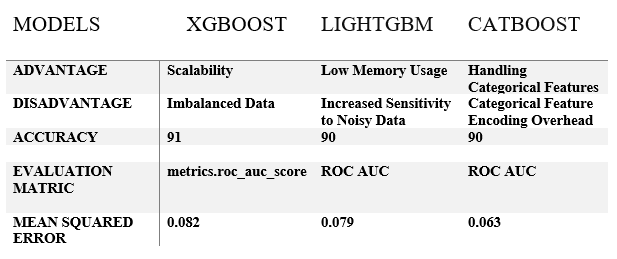

### XGBoost

XGBoost is a high-performance machine learning algorithm that builds accurate predictive models by combining the outputs of weak models, usually decision trees. It excels in handling structured data, offering efficiency, speed, and strong predictive capabilities across a range of tasks like classification and regression.

In [ ]:
import xgboost as xgb
from sklearn import metrics
from sklearn.model_selection import GridSearchCV

In [ ]:
# Function for model evaluation

def auc(m, X_train, X_test):
    return (metrics.roc_auc_score(y_train,m.predict_proba(X_train)[:,1]),
            metrics.roc_auc_score(y_test,m.predict_proba(X_test)[:,1]))

In [ ]:
%time
import xgboost as xgb
from sklearn.metrics import roc_auc_score

model = xgb.XGBClassifier(max_depth=50, min_child_weight=1, n_estimators=200, n_jobs=-1, learning_rate=0.2)
model.fit(X_train, y_train)

train_auc = roc_auc_score(y_train, model.predict_proba(X_train)[:, 1])
test_auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])

(train_auc, test_auc)

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 6.44 µs


(1.0, 0.9555030191987549)

In [ ]:
y_pred = model.predict(X_test)

Accuracy:  0.9105914718019257

********************************************
Confusion matrix


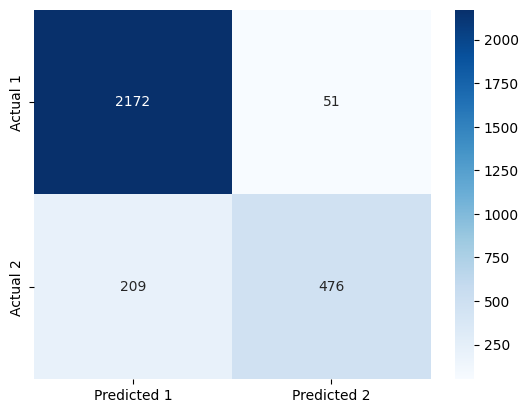

**********************************************
              precision    recall  f1-score   support

           0       0.91      0.98      0.94      2223
           1       0.90      0.69      0.79       685

    accuracy                           0.91      2908
   macro avg       0.91      0.84      0.86      2908
weighted avg       0.91      0.91      0.91      2908



In [ ]:
import matplotlib.pyplot as plt                               # Visualization package

%matplotlib inline
import seaborn as sns

print('Accuracy: ', metrics.accuracy_score(y_test,y_pred))
print('')
print('********************************************')
print('Confusion matrix')
lr_cfm=metrics.confusion_matrix(y_test, y_pred)


lbl1=["Predicted 1", "Predicted 2"]
lbl2=["Actual 1", "Actual 2"]

sns.heatmap(lr_cfm, annot=True, cmap="Blues", fmt="d", xticklabels=lbl1, yticklabels=lbl2)
plt.show()

print('**********************************************')
print(metrics.classification_report(y_test,y_pred))

### LightGBM

LightGBM is a high-speed, memory-efficient gradient boosting framework for machine learning. It excels in handling large datasets and sparse features, making it well-suited for various tasks like classification and regression.

In [ ]:
import lightgbm as lgb  # ligther version of GBM

In [ ]:
# Function to evaluate LightGBM model

def auc2(m, X_train, X_test):
    y_train_pred = m.predict(X_train)
    y_test_pred = m.predict(X_test)

    return (print('ROC AUC Train Score: ', metrics.roc_auc_score(y_train, y_train_pred)),
    print('ROC AUC Test Score: ', metrics.roc_auc_score(y_test, y_test_pred)),
    print('Avg. Precision Score: ', metrics.average_precision_score(y_test, y_test_pred)),
    print('Confusion Metrics: \n', metrics.confusion_matrix(y_test, y_test_pred)))

In [ ]:
def gini(y_test, y_test_pred):
    fpr, tpr, thr = metrics.roc_curve(y_test, y_pred, pos_label=1)
    g = 2 * metrics.auc(fpr, tpr) -1
    return g

def gini_lgb(preds, dtrain):
    y = list(dtrain.get_label())
    score = gini(y_test, y_test_pred,) / gini(y_test, y)
    return 'gini', score, True


In [ ]:
%time
model2 = lgb.LGBMClassifier(n_estimators=90,
                     silent=False,
                     random_state =94,
                     max_depth=5,
                     num_leaves=30,
                     objective='binary',
                     metrics ='auc')

model2.fit(X_train, y_train, eval_metric=gini_lgb)

CPU times: user 1 µs, sys: 0 ns, total: 1 µs
Wall time: 4.29 µs
[LightGBM] [Warning] Unknown parameter: silent
[LightGBM] [Warning] Unknown parameter: silent
[LightGBM] [Info] Number of positive: 1635, number of negative: 5149
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000479 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2403
[LightGBM] [Info] Number of data points in the train set: 6784, number of used features: 14
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.241008 -> initscore=-1.147160
[LightGBM] [Info] Start training from score -1.147160
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, bes

LGBMClassifier(max_depth=5, metrics='auc', n_estimators=90, num_leaves=30,
               objective='binary', random_state=94, silent=False)

In [ ]:
auc2(model2, X_train, X_test)

[LightGBM] [Warning] Unknown parameter: silent
[LightGBM] [Warning] Unknown parameter: silent
ROC AUC Train Score:  0.8832137471543716
ROC AUC Test Score:  0.8154217191866058
Avg. Precision Score:  0.662741550309655
Confusion Metrics: 
 [[2165   58]
 [ 235  450]]


(None, None, None, None)

[LightGBM] [Warning] Unknown parameter: silent
0.8992434662998624
********************************************
Confusion matrix


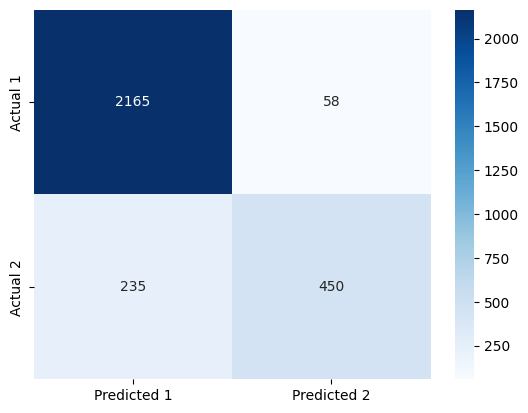

**********************************************
              precision    recall  f1-score   support

           0       0.90      0.97      0.94      2223
           1       0.89      0.66      0.75       685

    accuracy                           0.90      2908
   macro avg       0.89      0.82      0.85      2908
weighted avg       0.90      0.90      0.89      2908



In [ ]:
import matplotlib.pyplot as plt                               # Visualization package
y_test_pred = model2.predict(X_test)
%matplotlib inline
import seaborn as sns
print(metrics.accuracy_score(y_test,y_test_pred))
print('********************************************')
print('Confusion matrix')
lr_cfm=metrics.confusion_matrix(y_test, y_test_pred)


lbl1=["Predicted 1", "Predicted 2"]
lbl2=["Actual 1", "Actual 2"]

sns.heatmap(lr_cfm, annot=True, cmap="Blues", fmt="d", xticklabels=lbl1, yticklabels=lbl2)
plt.show()

print('**********************************************')
print(metrics.classification_report(y_test,y_test_pred))

### Catboost
CatBoost is a gradient boosting algorithm specialized in handling categorical features. It is efficient, easy to use, and robust against overfitting, making it suitable for various machine learning tasks.







In [ ]:
!pip install catboost

In [ ]:
import catboost as cb

In [ ]:
cat_features_index = [0,1,2,3,4,5,6]  # externally defines the category index

In [ ]:
clf = cb.CatBoostClassifier(eval_metric="AUC", depth=10, iterations= 500, l2_leaf_reg= 9, learning_rate= 0.15)
clf.fit(X_train,y_train)


0:	total: 48.7ms	remaining: 24.3s
1:	total: 54.6ms	remaining: 13.6s
2:	total: 84.1ms	remaining: 13.9s
3:	total: 108ms	remaining: 13.4s
4:	total: 131ms	remaining: 13s
5:	total: 156ms	remaining: 12.8s
6:	total: 180ms	remaining: 12.7s
7:	total: 204ms	remaining: 12.5s
8:	total: 228ms	remaining: 12.4s
9:	total: 254ms	remaining: 12.5s
10:	total: 278ms	remaining: 12.4s
11:	total: 302ms	remaining: 12.3s
12:	total: 326ms	remaining: 12.2s
13:	total: 353ms	remaining: 12.2s
14:	total: 377ms	remaining: 12.2s
15:	total: 400ms	remaining: 12.1s
16:	total: 423ms	remaining: 12s
17:	total: 447ms	remaining: 12s
18:	total: 473ms	remaining: 12s
19:	total: 508ms	remaining: 12.2s
20:	total: 535ms	remaining: 12.2s
21:	total: 560ms	remaining: 12.2s
22:	total: 583ms	remaining: 12.1s
23:	total: 609ms	remaining: 12.1s
24:	total: 665ms	remaining: 12.6s
25:	total: 715ms	remaining: 13s
26:	total: 765ms	remaining: 13.4s
27:	total: 814ms	remaining: 13.7s
28:	total: 878ms	remaining: 14.3s
29:	total: 962ms	remaining: 15.

In [ ]:
auc2(clf, X_train, X_test)

ROC AUC Train Score:  1.0
ROC AUC Test Score:  0.8230562368864327
Avg. Precision Score:  0.6702032550527616
Confusion Metrics: 
 [[2160   63]
 [ 223  462]]


(None, None, None, None)

0.9016506189821183
********************************************
Confusion matrix


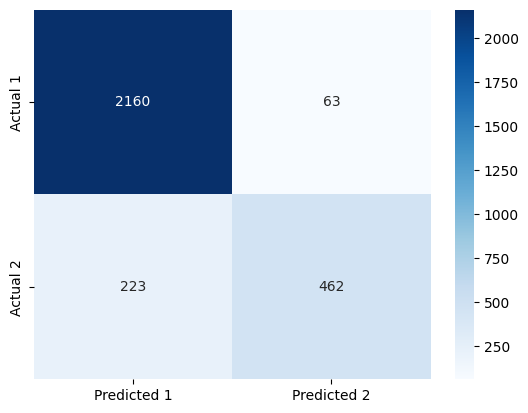

**********************************************
              precision    recall  f1-score   support

           0       0.91      0.97      0.94      2223
           1       0.88      0.67      0.76       685

    accuracy                           0.90      2908
   macro avg       0.89      0.82      0.85      2908
weighted avg       0.90      0.90      0.90      2908



In [ ]:
import matplotlib.pyplot as plt                               # Visualization package
y_test_p = clf.predict(X_test)
%matplotlib inline
import seaborn as sns
print(metrics.accuracy_score(y_test,y_test_p))
print('********************************************')
print('Confusion matrix')
lr_cfm=metrics.confusion_matrix(y_test, y_test_p)


lbl1=["Predicted 1", "Predicted 2"]
lbl2=["Actual 1", "Actual 2"]

sns.heatmap(lr_cfm, annot=True, cmap="Blues", fmt="d", xticklabels=lbl1, yticklabels=lbl2)
plt.show()

print('**********************************************')
print(metrics.classification_report(y_test, y_test_p))

In [ ]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import pandas as pd
import numpy as np

# Assuming you have your DataFrame 'df'
X = df.drop('ARRIVAL_DELAY', axis=1)
y = df['ARRIVAL_DELAY']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=10, test_size=0.3)

# Define a custom objective function
def custom_objective(y_true, y_pred):
    # Your custom loss calculation here
    residuals = y_pred - y_true
    grad = 2 * residuals
    hess = 2 * np.ones_like(residuals)
    return grad, hess

# Convert data to DMatrix format
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

# Set hyperparameters
params = {
    'objective': 'reg:squarederror',  # Use a built-in regression objective
    'eval_metric': 'rmse',  # You can use a built-in metric for evaluation
    'custom_function': custom_objective  # Pass the custom objective function
}

# Train the model
model = xgb.train(params, dtrain, num_boost_round=1000, evals=[(dtest, 'test')], early_stopping_rounds=10)

# Make predictions
y_pred = model.predict(dtest)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)


[0]	test-rmse:0.36060
[1]	test-rmse:0.32670
[2]	test-rmse:0.30814
[3]	test-rmse:0.29754
[4]	test-rmse:0.29341
[5]	test-rmse:0.29143
[6]	test-rmse:0.29088
[7]	test-rmse:0.29076
[8]	test-rmse:0.28752
[9]	test-rmse:0.28731
[10]	test-rmse:0.28614


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [15:00:28] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "custom_function" } are not used.

  warnings.warn(smsg, UserWarning)


[11]	test-rmse:0.28503
[12]	test-rmse:0.28495
[13]	test-rmse:0.28340
[14]	test-rmse:0.28343
[15]	test-rmse:0.28321
[16]	test-rmse:0.28322
[17]	test-rmse:0.28318
[18]	test-rmse:0.28302
[19]	test-rmse:0.28301
[20]	test-rmse:0.28342
[21]	test-rmse:0.28172
[22]	test-rmse:0.28136
[23]	test-rmse:0.27806
[24]	test-rmse:0.27653
[25]	test-rmse:0.27590
[26]	test-rmse:0.27301
[27]	test-rmse:0.27278
[28]	test-rmse:0.27257
[29]	test-rmse:0.27209
[30]	test-rmse:0.27247
[31]	test-rmse:0.27241
[32]	test-rmse:0.27206
[33]	test-rmse:0.27214
[34]	test-rmse:0.27108
[35]	test-rmse:0.27113
[36]	test-rmse:0.27021
[37]	test-rmse:0.27050
[38]	test-rmse:0.27058
[39]	test-rmse:0.27040
[40]	test-rmse:0.27021
[41]	test-rmse:0.26994
[42]	test-rmse:0.26883
[43]	test-rmse:0.26903
[44]	test-rmse:0.26886
[45]	test-rmse:0.26880
[46]	test-rmse:0.26868
[47]	test-rmse:0.26836
[48]	test-rmse:0.26829
[49]	test-rmse:0.26835
[50]	test-rmse:0.26797
[51]	test-rmse:0.26759
[52]	test-rmse:0.26754
[53]	test-rmse:0.26747
[54]	test-r

In [ ]:
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import pandas as pd
import numpy as np

# Assuming you have your DataFrame 'df'
X = df.drop('ARRIVAL_DELAY', axis=1)
y = df['ARRIVAL_DELAY']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=10, test_size=0.3)

# Convert data to LightGBM Dataset format
train_data = lgb.Dataset(X_train, label=y_train)
test_data = lgb.Dataset(X_test, label=y_test)

# Set hyperparameters
params = {
    'objective': 'regression',  # Use a built-in regression objective
    'metric': 'rmse',  # You can use a built-in metric for evaluation
    'early_stopping_rounds': 10,  # Set early stopping rounds here
}

# Train the model
model = lgb.train(params, train_data, num_boost_round=1000, valid_sets=[test_data])

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000873 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2390
[LightGBM] [Info] Number of data points in the train set: 6784, number of used features: 14
[LightGBM] [Info] Start training from score 0.241008
Training until validation scores don't improve for 10 rounds
Early stopping, best iteration is:
[149]	valid_0's rmse: 0.251013
Mean Squared Error: 0.063007553889692


In [ ]:
from catboost import CatBoostRegressor, Pool
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import pandas as pd

# Assuming you have your DataFrame 'df'
X = df.drop('ARRIVAL_DELAY', axis=1)
y = df['ARRIVAL_DELAY']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=10, test_size=0.3)

# Convert data to CatBoost Pool format
train_data = Pool(X_train, label=y_train)
test_data = Pool(X_test, label=y_test)

# Set hyperparameters
params = {
    'objective': 'RMSE',  # RMSE is used for regression tasks
    'early_stopping_rounds': 10,  # Set early stopping rounds here
    'iterations': 1000,  # You can adjust the number of iterations as needed
}

# Train the model
model = CatBoostRegressor(**params)
model.fit(train_data, eval_set=test_data)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)


Learning rate set to 0.068776
0:	learn: 0.4124968	test: 0.4100904	best: 0.4100904 (0)	total: 9.58ms	remaining: 9.57s
1:	learn: 0.3982895	test: 0.3967162	best: 0.3967162 (1)	total: 19.7ms	remaining: 9.81s
2:	learn: 0.3862202	test: 0.3857205	best: 0.3857205 (2)	total: 28.2ms	remaining: 9.36s
3:	learn: 0.3746234	test: 0.3750372	best: 0.3750372 (3)	total: 43.2ms	remaining: 10.8s
4:	learn: 0.3639081	test: 0.3652301	best: 0.3652301 (4)	total: 50.2ms	remaining: 9.99s
5:	learn: 0.3543042	test: 0.3564060	best: 0.3564060 (5)	total: 66.5ms	remaining: 11s
6:	learn: 0.3456543	test: 0.3486425	best: 0.3486425 (6)	total: 80.2ms	remaining: 11.4s
7:	learn: 0.3377426	test: 0.3414246	best: 0.3414246 (7)	total: 87.1ms	remaining: 10.8s
8:	learn: 0.3314234	test: 0.3357461	best: 0.3357461 (8)	total: 100ms	remaining: 11.1s
9:	learn: 0.3253426	test: 0.3305466	best: 0.3305466 (9)	total: 117ms	remaining: 11.6s
10:	learn: 0.3197176	test: 0.3255986	best: 0.3255986 (10)	total: 125ms	remaining: 11.2s
11:	learn: 0.314

In [ ]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Assuming you have your DataFrame 'df'
X = df.drop('ARRIVAL_DELAY', axis=1)
y = df['ARRIVAL_DELAY']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=10, test_size=0.3)

# Convert data to DMatrix format
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

# Set hyperparameters
params = {
    'objective': 'reg:squarederror',  # Use 'reg:squarederror' for regression tasks
    'eval_metric': 'rmse',  # Use 'rmse' as the evaluation metric
    'early_stopping_rounds': 10,  # Set early stopping rounds here
    'num_boost_round': 1000,  # You can adjust the number of boosting rounds as needed
}

# Train the model
model = xgb.train(params, dtrain, evals=[(dtest, 'test')])

# Make predictions
y_pred = model.predict(dtest)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)


[0]	test-rmse:0.36060


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [15:05:13] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "early_stopping_rounds", "num_boost_round" } are not used.

  warnings.warn(smsg, UserWarning)


[1]	test-rmse:0.32670
[2]	test-rmse:0.30814
[3]	test-rmse:0.29754
[4]	test-rmse:0.29341
[5]	test-rmse:0.29143
[6]	test-rmse:0.29088
[7]	test-rmse:0.29076
[8]	test-rmse:0.28752
[9]	test-rmse:0.28731
Mean Squared Error: 0.08254590044216523


**Conclusion:-**
- With the above analysis and the Models used we see that the best Model of 3 Models (XGBoost, LightGBM & Catboost) is XGBoost provideds 0.91% accuracy.
- The other two Models show that LightGBM is 0.87% and Catboost 0.89% accuracy.